#### AIM: 
Create binary mask, which is later used to select every third cell from param.nc
- Binary values:  nan and 1
- mask.shape: (n*3)+1

In [ ]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pylab as plt
import subprocess
import settings as s

plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = 12,8


In [ ]:
## generate binary mask of 19*19 cells
x = np.arange(0,19)
mask = np.full(len(x)*19, np.nan).reshape(19,19)
mask[::3 , ::3] = np.int64(1)
type(mask[0])
mask


In [ ]:
## crop existing landseamask file to 19x19 cells

inf = s.input_dir + "/landmask_for_testing.nc"
outf = s.input_dir + "/landmask_for_testing_19.nc"

cmd = f"cdo -f nc4c -z zip selindexbox,0,19,0,19  {inf} {outf}"
print(cmd)
subprocess.check_call(cmd, shell=True)

In [1]:
import os
os.getcwd()
#os.chdir("/mnt/c/Users/Anna/Documents/UNI/PIK/develop/")
s.output_dir = "/mnt/c/Users/Anna/Documents/UNI/PIK/improve_performance/test_output_correlation"
#s.input_dir = "/mnt/c/Users/Anna/Documents/UNI/PIK/develop/test_input"

NameError: name 's' is not defined

In [110]:
# open cropped landseamask file to overwrite its variable
#mask_file = s.input_dir + "/gswp3-w5e5_ssa_gmt.nc4"
#mask_file = s.output_dir + "/tas_trace_shape19_pickle_33.nc4" #s.input_dir / s.dataset / 'hurs_gswp3-w5e5_merged.nc4'
mask_file = s.output_dir + "/tas_trace_shape19_hpc.nc4" #s.input_dir / s.dataset / 'hurs_gswp3-w5e5_merged.nc4'
#out = s.input_dir + "/" + s.dataset + "/" + 'b_mask.nc'

mask_file = xr.open_dataset(mask_file)
print(mask_file.variables)

Frozen(OrderedDict([('time', <xarray.IndexVariable 'time' (time: 25933)>
array(['1950-01-01T18:30:00.000000000', '1950-01-02T18:00:00.000000000',
       '1950-01-03T18:00:00.000000000', ..., '2020-12-29T18:00:00.000000000',
       '2020-12-30T18:00:00.000000000', '2020-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')), ('lon', <xarray.IndexVariable 'lon' (lon: 19)>
array([7.491667, 7.508333, 7.525   , 7.541667, 7.558333, 7.575   , 7.591667,
       7.608333, 7.625   , 7.641667, 7.658333, 7.675   , 7.691667, 7.708333,
       7.725   , 7.741667, 7.758333, 7.775   , 7.791667])
Attributes:
    units:          degree_east
    long_name:      longitude
    standard_name:  longitude), ('lat', <xarray.IndexVariable 'lat' (lat: 19)>
array([44.108333, 44.091667, 44.075   , 44.058333, 44.041667, 44.025   ,
       44.008333, 43.991667, 43.975   , 43.958333, 43.941667, 43.925   ,
       43.908333, 43.891667, 43.875   , 43.858333, 43.841667, 43.825   ,
       43.808333])
Attributes:
    unit

In [111]:
mask_file.variables["weights_longterm_trend"][0,:10,:]

<xarray.Variable (lat: 10, lon: 19)>
array([[     nan,      nan,      nan,      nan, 0.052505,      nan,      nan,
        0.052802,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,      nan,
        0.055758,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan,      nan,
             nan,      na

In [112]:
print(sum(np.isnan(mask_file.variables["weights_sigma_fc_intercept_3"][ 0, :, :])))
mask_file.variables["weights_sigma_fc_intercept_3"].shape

<xarray.Variable (lon: 19)>
array([19, 19, 19, 19, 18, 18, 18, 18, 19, 19, 19, 18, 17, 18, 18, 19, 18, 19,
       19])


(25933, 19, 19)

In [114]:
mask_file.variables["weights_fc_intercept_0"][ 0, :10,:]

<xarray.Variable (lat: 10, lon: 19)>
array([[      nan,       nan,       nan,       nan, -0.166552,       nan,
              nan, -0.167439,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, -0.18216 ,       nan,       nan,       nan,
              nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              n

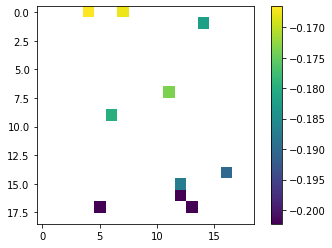

In [115]:
plt.imshow(mask_file.variables["weights_fc_intercept_0"][0,  :, :])
plt.colorbar()


In [ ]:
## overwrite current landseamask variable 
mask_file['area_European_01min'][:] = mask
mask_file.variables["area_European_01min"] #t = t.to_array()

In [ ]:
mask_file["binary_mask"] = mask_file["area_European_01min"]
mask_file = mask_file.drop(['area_European_01min'])
mask_file.variables["binary_mask"][:, :]

In [ ]:
plt.imshow(mask_file.variables["binary_mask"][ :, :])


In [ ]:
mask_file.to_netcdf(out)
out.close()